In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOCATION_SURVEY = './data_processed/survey_responses.csv'
LOCATION_QUESTIONS = './data_processed/questions.json'

survey = pd.read_csv(LOCATION_SURVEY)

# Load JSON data from the file
with open(LOCATION_QUESTIONS, 'r') as file:
    data = json.load(file)

# Convert data into a map from ID to object
map = {item['id']: item for item in data}


In [5]:
""" from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

likert_scale_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}

x = survey['7'].map(likert_scale_map)
y = survey['8'].map(likert_scale_map)

tuples = list(zip(y, x))

# Count the occurrences of each tuple
tuple_counts = Counter(tuples)

# Create a DataFrame from the tuple counts
heatmap_data = pd.DataFrame(list(tuple_counts.items()), columns=['Tuple', 'Count'])
heatmap_data[['X', 'Y']] = pd.DataFrame(heatmap_data['Tuple'].tolist(), index=heatmap_data.index)
heatmap_data = heatmap_data.pivot(index='X', columns='Y', values='Count').fillna(0)
heatmap_data = heatmap_data.drop(index=np.nan, columns=np.nan)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of X,Y Coordinates')
# Remove the row and column with NaN values
plt.gca().invert_yaxis()
plt.xlabel(map[7]["title"])
plt.ylabel(map[8]["title"])
plt.show() """

' from collections import Counter\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport numpy as np\n\nlikert_scale_map = {\n    "Strongly disagree": 1,\n    "Disagree": 2,\n    "Neither agree nor disagree": 3,\n    "Agree": 4,\n    "Strongly agree": 5\n}\n\nx = survey[\'7\'].map(likert_scale_map)\ny = survey[\'8\'].map(likert_scale_map)\n\ntuples = list(zip(y, x))\n\n# Count the occurrences of each tuple\ntuple_counts = Counter(tuples)\n\n# Create a DataFrame from the tuple counts\nheatmap_data = pd.DataFrame(list(tuple_counts.items()), columns=[\'Tuple\', \'Count\'])\nheatmap_data[[\'X\', \'Y\']] = pd.DataFrame(heatmap_data[\'Tuple\'].tolist(), index=heatmap_data.index)\nheatmap_data = heatmap_data.pivot(index=\'X\', columns=\'Y\', values=\'Count\').fillna(0)\nheatmap_data = heatmap_data.drop(index=np.nan, columns=np.nan)\n\n# Plot the heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(heatmap_data, annot=True, cmap=\'Blues\', linewidths=0.5)\nplt.title(\'Heatmap of X,Y Coor

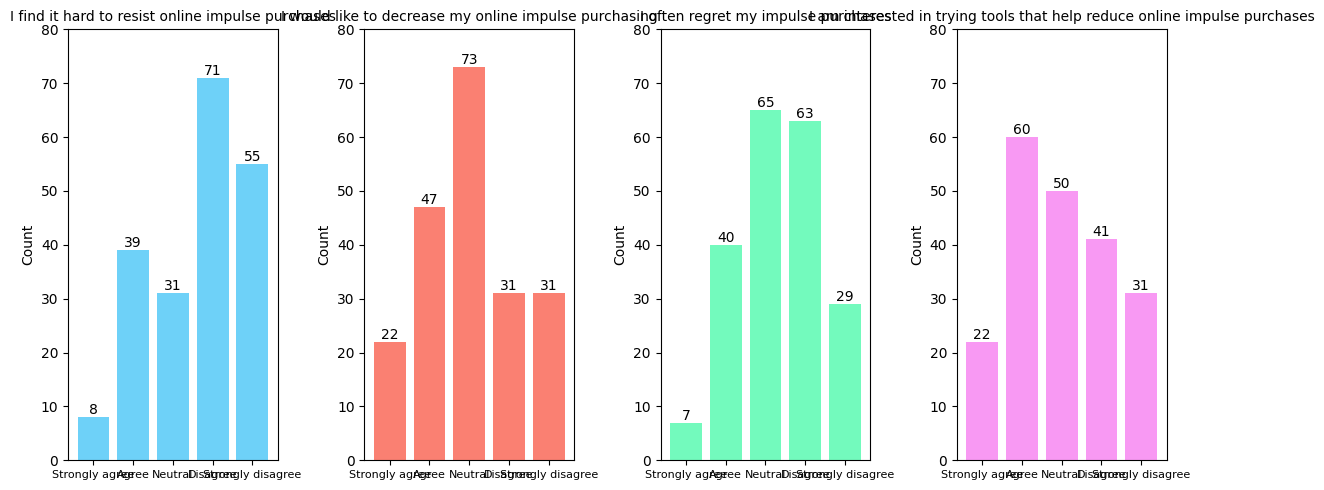

In [6]:

values7 = survey['7'].value_counts()
values8 = survey['8'].value_counts()
values9 = survey['9'].value_counts()
values11 = survey['11'].value_counts()

questions = [map[7], map[8], map[9], map[11]]

# Define data for each of the four plots
labels = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
plot_data = [
    [values7.get('Strongly agree', 0), values7.get('Agree', 0), values7.get('Neither agree nor disagree', 0), values7.get('Disagree', 0), values7.get('Strongly disagree', 0)],   # Data for Plot 1
    [values8.get('Strongly agree', 0), values8.get('Agree', 0), values8.get('Neither agree nor disagree', 0), values8.get('Disagree', 0), values8.get('Strongly disagree', 0)],   # Data for Plot 2
    [values9.get('Strongly agree', 0), values9.get('Agree', 0), values9.get('Neither agree nor disagree', 0), values9.get('Disagree', 0), values9.get('Strongly disagree', 0)],   # Data for Plot 3
    [values11.get('Strongly agree', 0), values11.get('Agree', 0), values11.get('Neither agree nor disagree', 0), values11.get('Disagree', 0), values11.get('Strongly disagree', 0)]  # Data for Plot 4
]



# Create a 2x2 grid for subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

# Flatten the 2x2 grid into a 1D array for easy iteration
axes = axes.flatten()
colors = ['#6ED1F8', 'salmon', '#73FABD', '#F899F3', '#E0F26D','#106ED3']
for i, ax in enumerate(axes):
    counts = plot_data[i]
    ax.bar(labels, counts, color=colors[i])
    ax.set_ylabel('Count')
    ax.set_title(questions[i]['title'])
    ax.title.set_size(10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 80)

    # Add counts to the bars
    for j, count in enumerate(counts):
        ax.text(j, count, str(count), ha='center', va='bottom')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
# Save the plot to a PNG file
# fig.savefig('plots/survey_likert_questions.png')

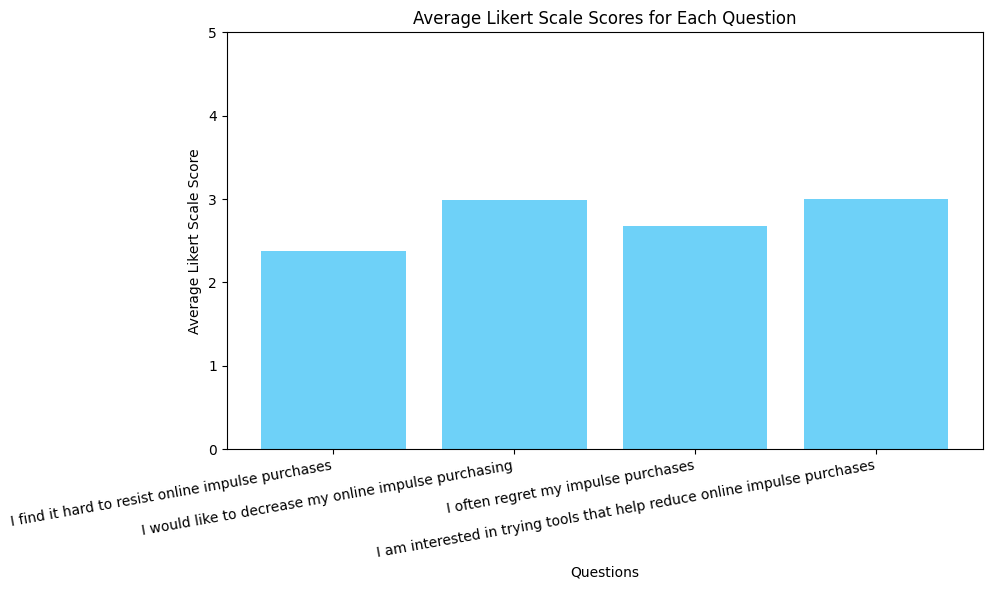

In [7]:
# Calculate the average Likert scale score for each question
average_scores = []
for row in plot_data:
    avg_total = 0
    for i, count in enumerate(row):
        avg_total += (5 - i) * count
    average_scores.append(avg_total / sum(row))

# Extract question titles
question_titles = [question['title'] for question in questions]

# Plot the average Likert scale scores for each question
plt.figure(figsize=(10, 6))
plt.bar(question_titles, average_scores, color='#6ED1F8')
plt.xlabel('Questions')
plt.ylabel('Average Likert Scale Score')
plt.title('Average Likert Scale Scores for Each Question')
plt.ylim(0, 5)  # Likert scale ranges from 1 to 5
# Rotate x-axis labels for better readability
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

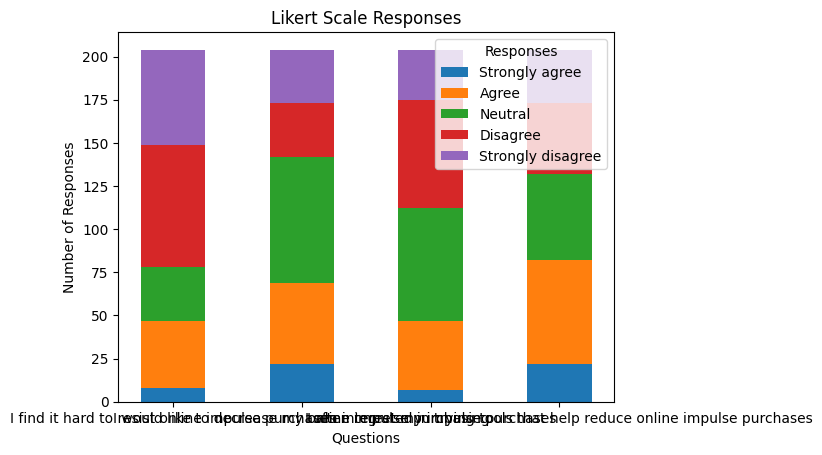

In [8]:
import matplotlib.pyplot as plt
import numpy as np



question_titles = [question['title'] for question in questions]

# Rebuild the responses dictionary using plot_data
responses = {
    'Strongly agree': [plot_data[0][0], plot_data[1][0], plot_data[2][0], plot_data[3][0]],
    'Agree': [plot_data[0][1], plot_data[1][1], plot_data[2][1], plot_data[3][1]],
    'Neutral': [plot_data[0][2], plot_data[1][2], plot_data[2][2], plot_data[3][2]],
    'Disagree': [plot_data[0][3], plot_data[1][3], plot_data[2][3], plot_data[3][3]],
    'Strongly disagree': [plot_data[0][4], plot_data[1][4], plot_data[2][4], plot_data[3][4]]
}

# Create the bar plot
bar_width = 0.5
x = np.arange(len(questions))
bottoms = np.zeros(len(questions))

for label, counts in responses.items():
    plt.bar(x, counts, bottom=bottoms, label=label, width=bar_width)
    bottoms += np.array(counts)

plt.xticks(x, question_titles)
plt.xlabel('Questions')
plt.ylabel('Number of Responses')
plt.title('Likert Scale Responses')
plt.legend(title='Responses')
plt.color_sequences
plt.show()

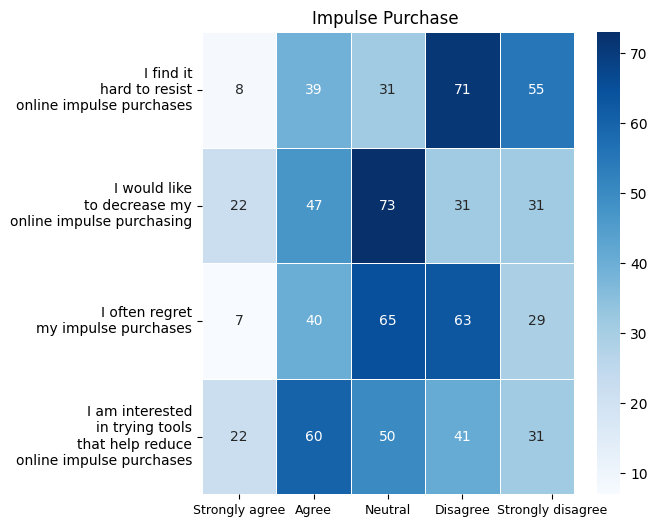

In [9]:
import seaborn as sns
import pandas as pd


# Split question titles for every four words
def split_title(title):
    words = title.split()
    return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])

modified_question_titles = [split_title(title) for title in question_titles]
# Creating a DataFrame
data = pd.DataFrame(responses, index=modified_question_titles)

# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Impulse Purchase ')
plt.xticks(rotation=0, ha='center', size=9)
# Adjust the positions of specific x-ticks
xticks = plt.gca().get_xticks()
xticklabels = plt.gca().get_xticklabels()
xticks[4] += 0.2

plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xticklabels)
plt.show()
# Save the plot to a PNG file
# plt.savefig('plots/survey_likert_heatmap.png')


/opt/homebrew/anaconda3/envs/reddit/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


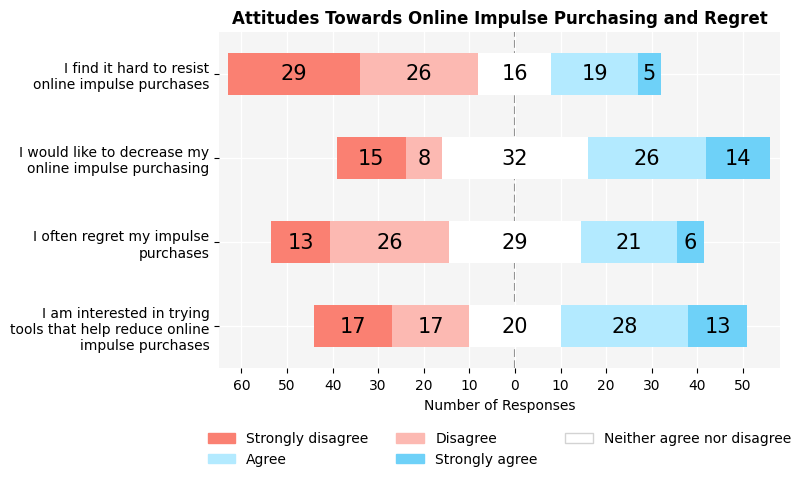

In [10]:
import plot_likert
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rng = np.random.default_rng(seed=42)

students_data = survey[~survey['4'].isin(["Graduate / Postgraduate", "Undergraduate"])]
data = pd.DataFrame(students_data[['7', '8', '9', '11']].values, columns=question_titles)

colors = ["#ffffff00", "#FA8072", "#FCB9B2", "#ffffff", "#B3EAFF", "#6ED1F8"]
ax = plot_likert.plot_likert(data, plot_likert.scales.agree, figsize=(8, 5), colors=colors)
# Get all bars from ax and set their z-index
for bars in ax.containers:
    for bar in bars:
        bar.set_zorder(3)

ax.grid(color='white', linewidth=1, axis='y', alpha=1, zorder=-1)
ax.grid(color='white', linewidth=1, axis='x', alpha=1, zorder=-1)
ax.set_facecolor('#F5F5F5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('Attitudes Towards Online Impulse Purchasing and Regret', fontweight='bold')

for bars in ax.containers[1:]:
    ax.bar_label(bars, label_type='center', fmt='%.0f', color='black', fontsize=15)

from matplotlib.patches import Patch

# Add legend
handles = [
    Patch(color=colors[1], label='Strongly disagree'),
    Patch(color=colors[4], label='Agree'),
    Patch(color=colors[2], label='Disagree'),
    Patch(color=colors[5], label='Strongly agree'),
    Patch(facecolor=colors[3], label='Neither agree nor disagree', edgecolor='lightgrey'),
]
legend = ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)
legend.get_frame().set_edgecolor('none')  # Remove outline




# Save the plot to a PNG file
plt.tight_layout()
plt.savefig('plots/survey_likert_plot.png', dpi=300)

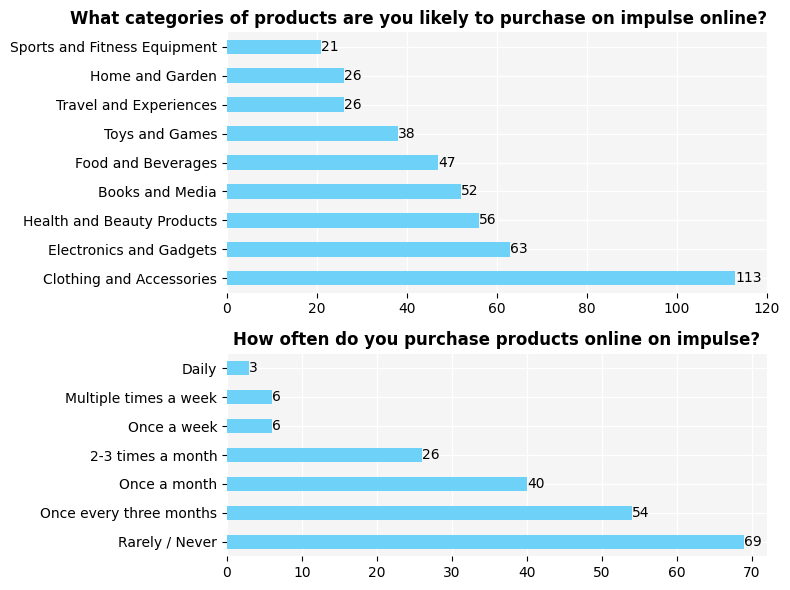

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [9/7, 1]})


# Plot for question 10
q10 = survey['10'].dropna()
q10 = q10.str.split('|').explode()
q10_counts = q10.value_counts()
q10_counts.plot(kind='barh', color='#6ED1F8', ax=axes[0], zorder=3)
for index, value in enumerate(q10_counts):
    axes[0].text(value, index, str(value), va='center')
axes[0].set_title("What categories of products are you likely to purchase on impulse online?", fontweight='bold', loc='right')
axes[0].set_xlim(0, 120)

# Plot for question 6
counts = survey['6'].value_counts()
counts = counts.groupby(counts.index).sum()
counts = counts.reindex(['Rarely / Never', 'Once every three months', 'Once a month', '2-3 times a month', 'Once a week', 'Multiple times a week', 'Daily'])
counts.plot(kind='barh', color='#6ED1F8', ax=axes[1], zorder=3)
for index, value in enumerate(counts):
    axes[1].text(value, index, str(value), va='center')
axes[1].set_title("How often do you purchase products online on impulse?", fontweight='bold')
axes[1].set_xlim(0, 72)

axes[1].set_ylabel('')
axes[0].set_ylabel('')

axes[0].grid(color='white', linewidth=1, axis='y', alpha=1, zorder=-1)
axes[0].grid(color='white', linewidth=1, axis='x', alpha=1, zorder=-1)
axes[0].set_facecolor('#F5F5F5')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)


axes[1].grid(color='white', linewidth=1, axis='y', alpha=1, zorder=-1)
axes[1].grid(color='white', linewidth=1, axis='x', alpha=1, zorder=-1)
axes[1].set_facecolor('#F5F5F5')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)


plt.tight_layout()
plt.show()

# Save the plot to a PNG file
fig.savefig('plots/survey_categorical_questions.png', dpi=300)

In [32]:
# I want to see the mean and distribution of purchases per month (For the question on how often they purchase products online on impulse)
title_to_value = {
    'Rarely / Never': 0.1 * 1.61,
    'Once every three months': 0.33 * 1.61,
    'Once a month': 1 * 1.61,
    '2-3 times a month': 2.5 * 1.61,
    'Once a week': 7 * 1.61,
    'Multiple times a week': 14 * 1.61,
    'Daily': 30 * 1.61
}

counts = survey['6'].map(title_to_value)

print("mean", counts.mean())
print("std", counts.std())


mean 2.7284764705882356
std 6.959521880960063


In [13]:
powertest = TTestIndPower()

percentage_effect = -0.2
mean_before = 5
mean_after = mean_before * (1 + percentage_effect)
std = 4

effect_size = (mean_after - mean_before) / std

powertest.solve_power(effect_size=effect_size, power=0.8, nobs1=None, ratio=1, alpha=0.05)

NameError: name 'TTestIndPower' is not defined

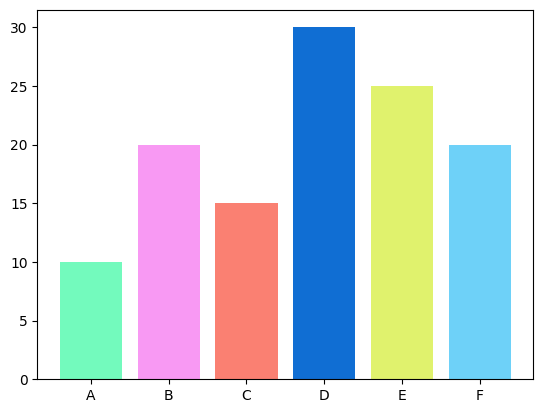

In [ ]:
import random
colors = ['#6ED1F8', 'salmon', '#73FABD', '#E0F26D','#F899F3', '#106ED3']
random.shuffle(colors)
labels = ["A", "B", "C", "D", "E", "F"]
data = [10, 20, 15, 30, 25, 20]

plt.bar(labels, data, color=colors)
plt.show()